<a href="https://colab.research.google.com/github/sidvin101/explainable-ml-ii/blob/main/explainable_ml_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #06
### This is the 2nd explainable techniques assignment for my class.
### Siddarth Vinnakota

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

#### Using environment variables in Google Colab

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

In [1]:
!pip install numpy==1.25.2 pandas==2.0.3 scikit-learn==1.2.2 shap==0.45.1
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pa

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-gdga0fra/alepython_0b85d22f2f9149e99197824fb88a25bc
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-gdga0fra/alepython_0b85d22f2f9149e99197824fb88a25bc
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.2 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15139 sha256=82fbba20a0547c67fc58421070a37330f25a2d27245a82588877f97081a4c319
  Stored in directory: /tmp/pip-ephem-wheel-cache-us5judw1/wheels/80/2e/91/7f216caef9a7f0c6ce18ee562b6156df43b3a79f69a0c1f3d1
Successfully built alepython


In [2]:
# Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# XAI
import shap
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from alepython import ale_plot

np.random.seed(0)

In [3]:
#We will use the housing data from the shap library
X, y = shap.datasets.california()

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y[0:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

# EDA to Check for Feature Correlations

In [5]:
correlation_matrix = X.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


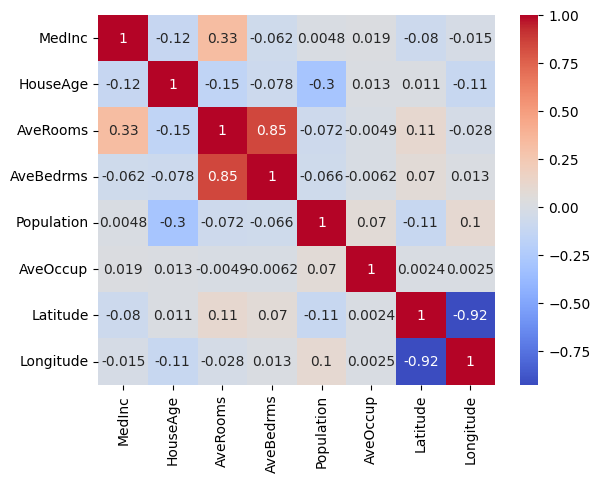

In [6]:
#Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.show()

Based on the correlation plot, there are strong variable correlations between the average number of rooms and the average number of bedrooms, as well as longitude and latitude.

# Partial Dependence Plot

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Initialize and fit the linear regression model
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

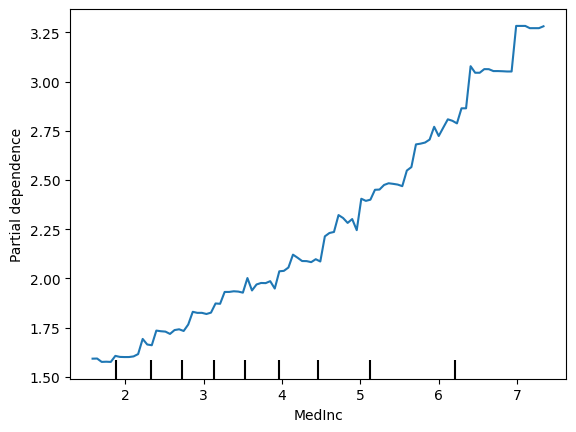

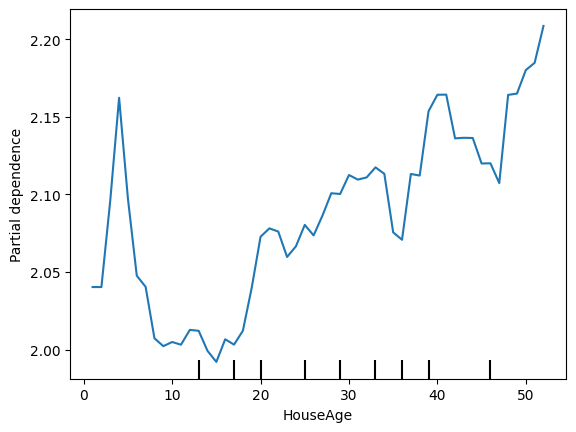

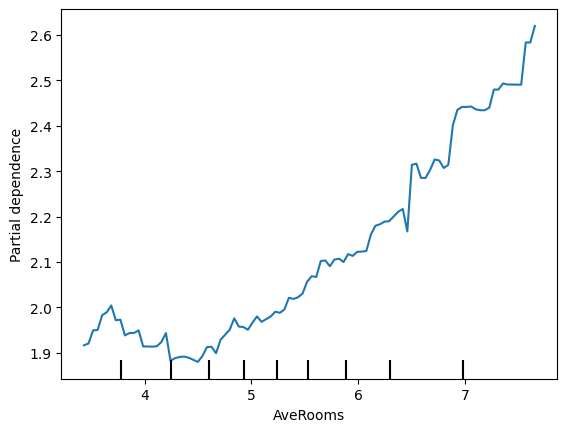

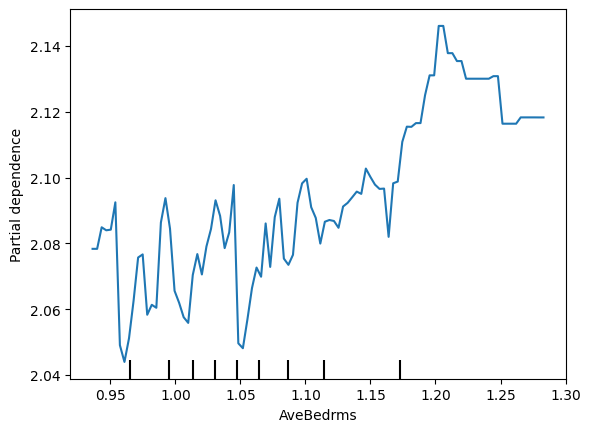

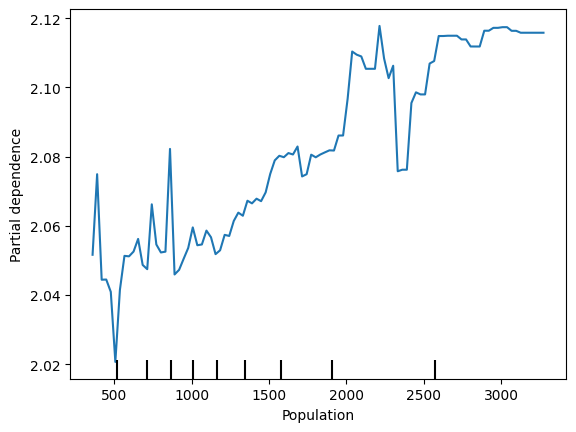

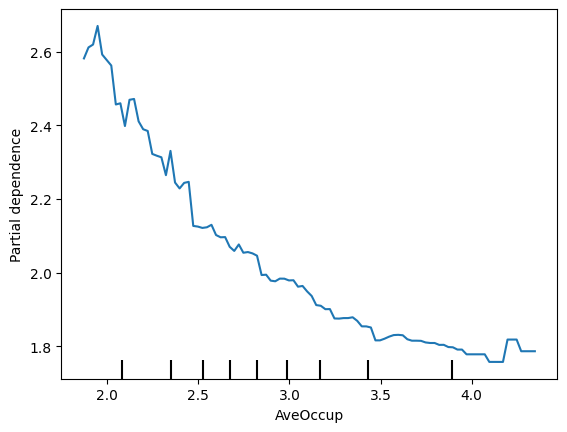

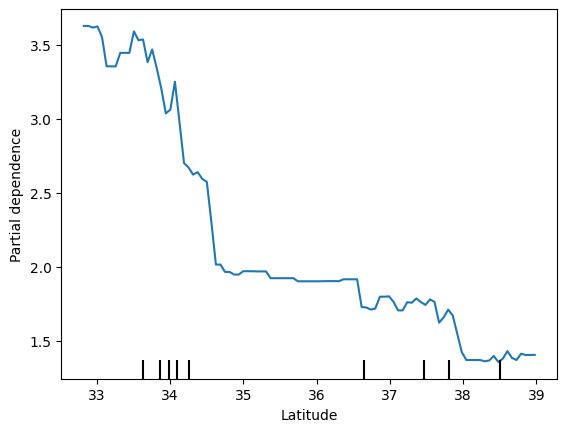

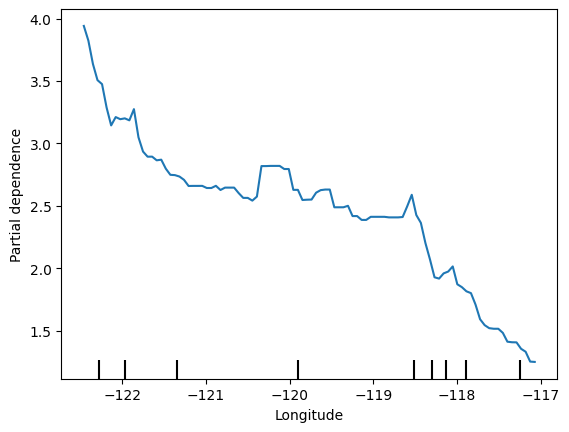

In [8]:
for column in X.columns:
    feature = [column]
    PartialDependenceDisplay.from_estimator(model, X_test, feature, kind='average')

## Analysis of each feature

### Median Income


*   Seems to have a linear relationship
*   As the Median Income increases, so do our predictions. There seems to be a slight slope upwards.
*   While the curve does not particular have an upper limit, it does plateau a bit the highest parts. This indicates that increasing the income past eh given data might not have that big of an effect.
*   This makes sense. As you have a higher income, it does make sense that you would choose to have a higher-priced house.

### Median House Age


*   Seems to have a slight linear relationship, but the values vary widely
*   As the Housing Age increases, so do our predictions. It stills vary widely, however
*   There does not seem to be any limits with this pattern
*   This makes sense. Houses tend to accumulate in value, so the older the house, the more expensive. However, it is not always the case, which could explain the variability.


### Average Rooms

*   Seems to have a slight linear relationship. However, in the very beginning, there is a small dip, before it progresses linearly
*   As the Number of Rooms increases, so do our predictions. However, around between 4-5 rooms, there does seems to be a slight dip.
*   There does not seem to be any upper limit. However, there does appear to be a lower limit in the income, between 4 and 5 rooms
*   This makes sense. Having more rooms would make sense to have an increase in the housing income.

### Average Bedrooms

*   Very similar to Average Rooms, but with more variability
*   As the Number of Average Bedrooms increases, so do our predictions. However, there does appear to be a slight dip at the end.
*   There does not seem to be any limits, though there is a local maximum when the average number of bedrooms is around 1.20
*   This makes sense. Having more rooms would make sense to have an increase in the housing income.


### Population

*   A slight linear relationship, but with a lot of variability
*   As the Population increases, so do our predictions. However, the values are extremely variable.
*   There does not seem to be any lower limits. However there does appear to be a plateau at around 2500 population, which implies that howing income won't seem to have that much of a difference when the population is more than 2500
*   This makes sense, but it still is interesting to look at.

### Average Occupants

*   A slight linear relationship, with a slight curve
*   As the number of occupants increases, the housing income seems to decrease
*   There does not seem to be any lower limits other than the minimum housing income, since houses will have to price with something.
*   This makes sense. A theory is that a lot of poorer households tend to have a lot more occupants.

### Latitude and Longitude
*   Not a linear relationship
*   As the latitude and longitude increases, the predictions decrease
*   There does not seem to be any upper or lower limits other than the minimum housing income, since houses will have to price with something.
*   This is interesting, as it indicates that a location decreases the income as the all move positive.


# ALE Plot

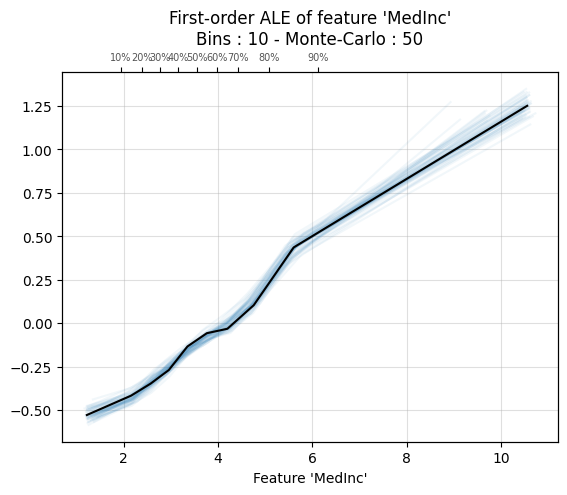

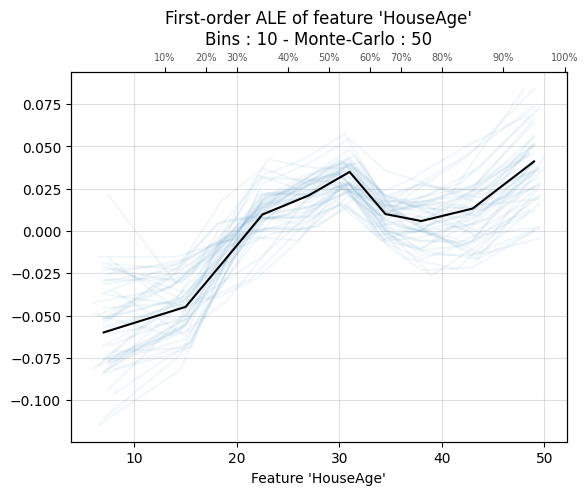

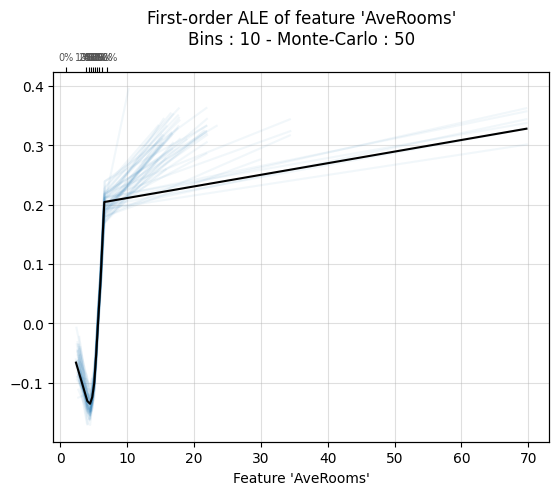

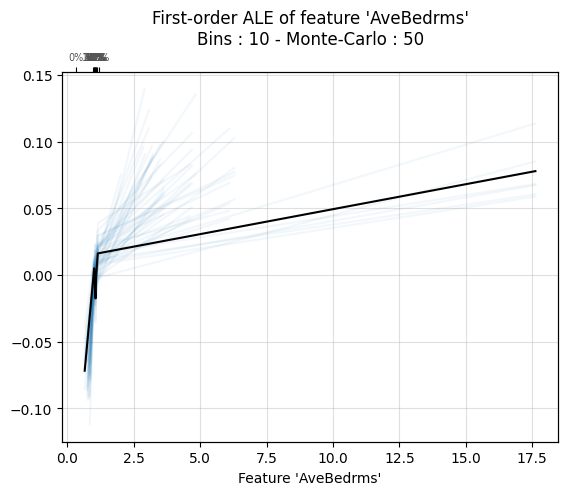

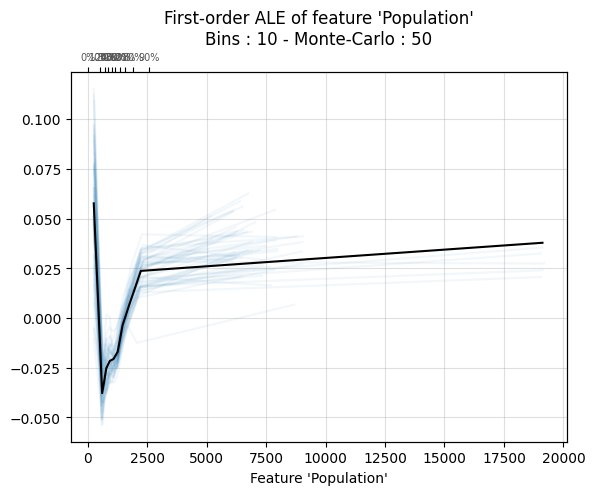

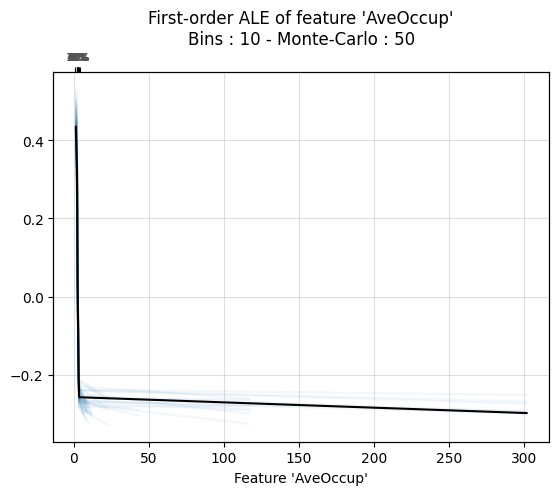

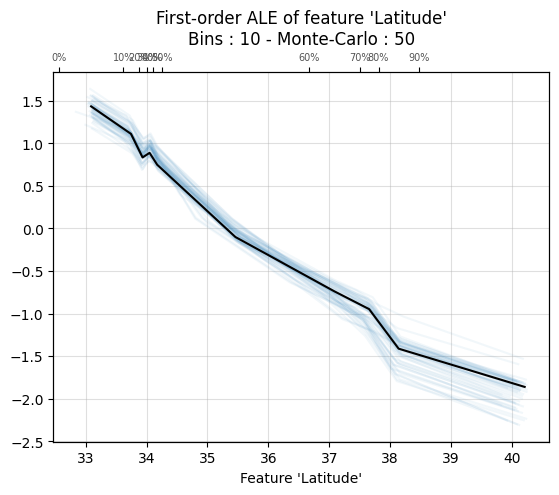

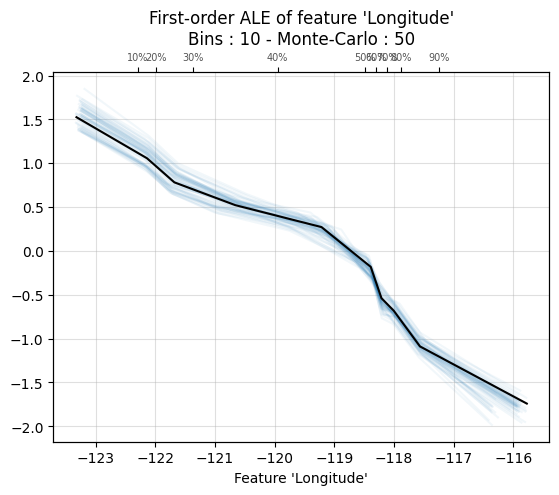

In [9]:
for column in X.columns:
    ale_plot(model, X_train, column, monte_carlo=True)



## Analysis of each feature

For context, steep curves imply drastic significance

### Median Income


*   Significant Impact
*   As the Median Income increases, so do our predictions. There seems to be a slight slope upwards.
*   Not a drastic effect

### Median House Age


*   Seems to have a slight linear relationship, but the values vary widely
*   As the Housing Age increases, so do our predictions. It stills vary widely, however
*   Not an extremely steep curve


### Average Rooms

*  An extremely steep curve
*  As the Number of Rooms increases, so do our predictions.

### Average Bedrooms

*   An extremely steep curve
*   As the Number of Average Bedrooms increases, so do our predictions.


### Population

*   A slight linear relationship, but with a lot of variability
*   As the Population increases, so do our predictions. However, the values are extremely variable.
*   There does not seem to be any lower limits. However there does appear to be a plateau at around 2500 population, which implies that howing income won't seem to have that much of a difference when the population is more than 2500
*   This makes sense, but it still is interesting to look at.

### Average Occupants

*   A slight linear relationship, with a slight curve
*   As the number of occupants increases, the housing income seems to decrease
*   There does not seem to be any lower limits other than the minimum housing income, since houses will have to price with something.
*   This makes sense. A theory is that a lot of poorer households tend to have a lot more occupants.

### Latitude and Longitude
*   Not a linear relationship
*   As the latitude and longitude increases, the predictions decrease
*   There does not seem to be any upper or lower limits other than the minimum housing income, since houses will have to price with something.
*   This is interesting, as it indicates that a location decreases the income as the all move positive.

# ICE Plot

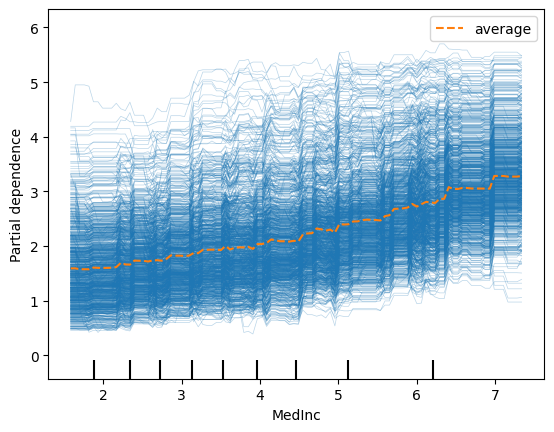

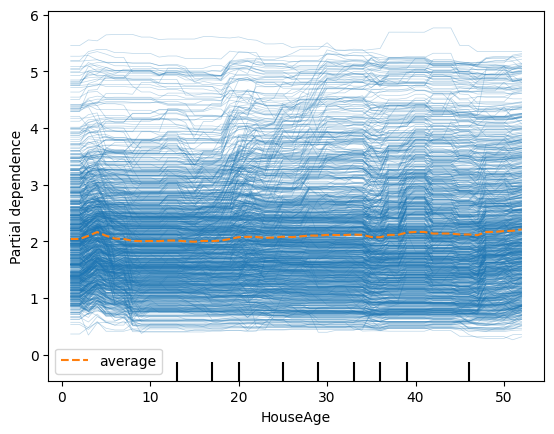

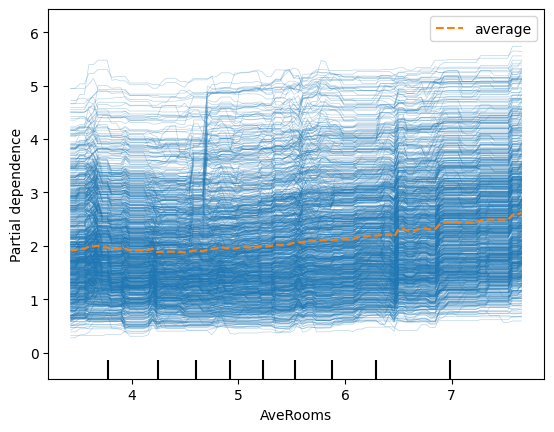

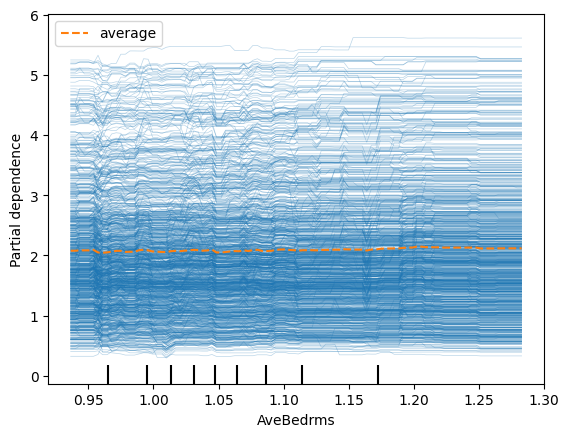

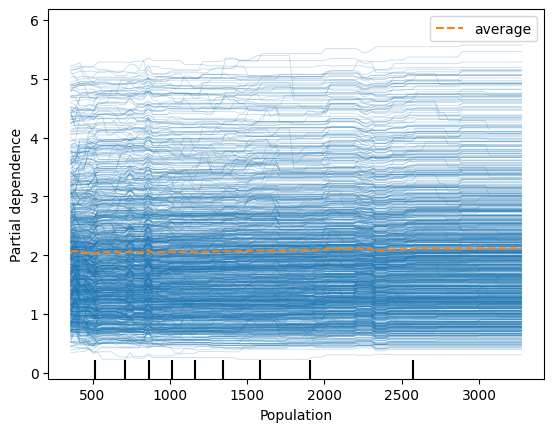

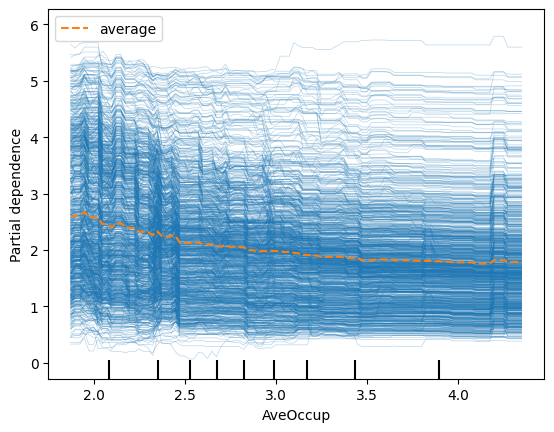

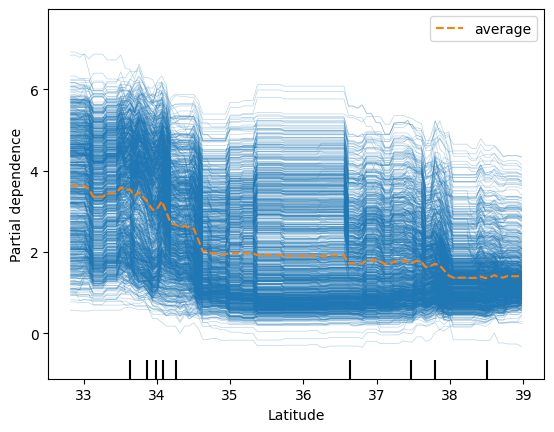

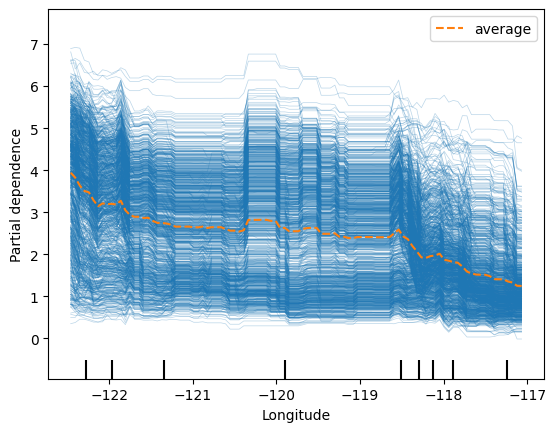

In [10]:
for column in X.columns:
    feature = [column]
    PartialDependenceDisplay.from_estimator(model, X_test, feature, kind='both')



## Analysis of each feature


### Median Income


*   Gradual increase as income increases

### Median House Age


*   Does not seem to play a key part to the house income


### Average Rooms

*  Extremeley minor increases as the number of average rooms increase

### Average Bedrooms

*   Does not seem to play a key part to the house income


### Population

*   Does not seem to play a key part to the house income  

### Average Occupants

*  Gradual decrese as the number of occupants increase

### Latitude and Longitude
*   Gradual decreae as the Latitude and Longitude increases

#Overall Differences of Plots

Overall, the plots show similar patterns. The PDP showcases a great overall trend. The ALE plot shows some steep and odd curves, but is especially useful when looking at Longitude vs Latitude and Average Rooms vs Average Bedrooms, items which are heavily correlated with one another (refer to the initial EDA at the top). Finally, the ICE plots help look at individual interactions as they change. There are some factors that the ICE plots consider as not having that much of an effect compared to the other two plots.